In [1]:
import torch
import numpy as np

inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]] # step (x^6)
)

## 🧠 3.1 Attention Mechanism در مدل‌های ترنسفورمر

مکانیزم Attention به مدل کمک می‌کند تا تشخیص دهد کدام بخش‌های ورودی مهم‌تر هستند. به‌جای اینکه مدل فقط به ترتیب کلمات تکیه کند، Attention وزن اهمیت هر کلمه نسبت به بقیه را محاسبه می‌کند.

---

### 🎯 هدف:
برای هر کلمه هدف (target)**، بفهمیم که باید به کدام **کلمات ورودی (context) بیشتر توجه کند.

---

### ⚙️ مراحل اصلی:

#### 1️⃣ تبدیل به Query، Key و Value

هر بردار ورودی \( x_i \) با سه ماتریس ضرب می‌شود:

- \( Q = x_i W^Q \) → Query
- \( K = x_i W^K \) → Key
- \( V = x_i W^V \) → Value

این‌ها نسخه‌های متفاوتی از اطلاعات اصلی هستند که برای محاسبه توجه استفاده می‌شوند.

---

#### 2️⃣ محاسبه نمره Attention

برای هر کلمه، با بقیه کلمات مقایسه می‌شود:

\[
\text{Score}(i, j) = \frac{Q_i \cdot K_j^T}{\sqrt{d_k}}
\]

- \( Q_i \): Query کلمه فعلی  
- \( K_j \): Key تمام کلمات  
- \( d_k \): تعداد ابعاد (برای نرمال‌سازی)

---

#### 3️⃣ اعمال Softmax برای نرمال‌سازی

\[
\alpha_{ij} = \text{Softmax}(\text{Score}_{ij})
\]

این باعث می‌شود نمرات به شکل احتمال دربیایند: مجموع‌شان برابر ۱ می‌شود.

---

#### 4️⃣ وزن‌دهی به Valueها

\[
\text{Attention}(Q_i, K, V) = \sum_j \alpha_{ij} V_j
\]

یعنی: ترکیب خطی‌ای از همه Valueها، بر اساس میزان توجه مدل به هر کلمه.

---

### 🧠 نتیجه:
کلمه نهایی، برداری است که اطلاعاتش ترکیبی از کل جمله است — اما با توجه به اهمیت!

---

### 📌 مثال شهودی:
اگر مدل در حال پردازش جمله‌ی زیر باشد:

> "The cat sat on the mat."

در موقع پیش‌بینی کلمه‌ی بعد از "sat"، ممکن است توجه بیشتری به "cat" و "mat" داشته باشد، چون به لحاظ معنایی مرتبط‌اند.

---

### 🧮 شکل کلی فرمول Attention:

\[
\text{Attention}(Q, K, V) = \text{Softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right) V
\]

---

### 🏁 کاربرد:
این مکانیزم به مدل اجازه می‌دهد تا:

- حافظه کوتاه‌مدت انعطاف‌پذیر داشته باشد.
- روابط دورتر در جمله را درک کند.
- ساختار زبانی دقیق‌تری یاد بگیرد.

## 🏁 3.2 Simple Attention 
---

In [2]:
query = inputs[1]

# برای ساخت وزن های تصادفی مشابه و اندازه ی کوئری مشابه از متد های زیر استفاده میکنیم
## torch.empty(inputs.shape[0])
### torch. zeros(inpits.shape[0])
#### .shape[0] -> اولین خط ماتریس رو برمیگرداند
attn_scores_2 = torch.empty(inputs.shape[0])
print(attn_scores_2)

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2) 

tensor([3.6812e-04, 1.0019e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


## 📊 Simple Normalization
----
🤖 با تقسیم جمع مقادیر بر روی هر مقدار مانند نرمالیزیشن ساده

In [3]:
atten_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
print("Attention weights:", atten_weights_2_tmp)
print("sum", atten_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum tensor(1.0000)


## ⚙️ Softmax-based Formula

In [4]:
def softmax_navie(x):
    return torch.exp(x)/ torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_navie(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())


Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


## 💻Softmax-Method Formula

In [5]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [6]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


## 🧮 3.3.2 Computing attention weights for all input tokens
---
 🚩3.3.2.1 Compute the attention scores as dot products between the inputs.

In [7]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<span style="color:rgb(253, 173, 119);">dot prodoct method without using for loops :</span>


In [8]:
# dot prodoct method without using for loops

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


<span style="color:rgb(253, 173, 119);">Softmax on Attention Score :</span>


In [9]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)

print()
print("All row sums:", attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<span style="color:rgb(253, 173, 119);">Computing all context vectors :</span>


In [10]:
all_context_vecs = attn_weights @ inputs
print(inputs)
print()
print(attn_weights)
print()
print(all_context_vecs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


##  3.4 Implementing <span style="color:rgb(253, 173, 119);">self-attention</span> with <span style="color:rgb(253, 173, 119);">trainable weights</span>

    3.4.1 Similarly, we start here by computing only one context
    vector, z
    (2), for illustration purposes. We will then modify this
    code to calculate all context vectors
___


In [11]:
x_2 = inputs[1] # 1. The second input element

d_in = inputs.shape[1] # 2. The input embedding size, d=3
print(d_in)

d_out = 2 # 3. The output embedding size, d_out=2
print(d_out)

3
2


## 🎯 درک ابعاد ماتریس وزن (W_query) در ترنسفورمر

در ترنسفورمرها، برای محاسبه‌ی بردارهای Query، Key و Value از ماتریس‌های وزن استفاده می‌شود. این ماتریس‌ها با ضرب در بردار ورودی، ویژگی‌های جدیدی را استخراج می‌کنند.

### 🧮 تعریف:
```python
W_query = torch.rand(d_in, d_out)

W_query.shape → torch.Size([3, 2])

W_query = [
  [w11, w12],
  [w21, w22],
  [w31, w32]
]

x = [x1, x2, x3]   → shape = (3,)

q = x @ W_query   → shape = (2,)

🫵🫵🫵🫵🫵🫵</br>
 We set requires_grad=False to reduce clutter in the outputs, but if we were to use the weight matrices for model training, we would set requires_grad=True to update these matrices during model training.</br>
👇🏾

In [12]:
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
print(w_query)
print()

w_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
print(w_key)
print()

w_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
print(w_value)
print()

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])



In [13]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value

print(query_2)
print(key_2)
print(value_2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


## obtain all keys and values via matrix multiplication:
---

In [14]:
keys = inputs @ w_key
values = inputs @ w_value
querys = inputs @ w_query
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)
print("querys.shape:", querys.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
querys.shape: torch.Size([6, 2])


First, let’s compute the attention score ω22:


In [15]:
keys_2 = keys[1]
query_22 = querys[1]
attn_score_22 = query_22 @ key_2

all_attn_score_2 = querys @ keys.T

attn_scores_2 = query_2 @ keys.T #1 All attention scores for given query


print(query_22)
print(key_2)
print(attn_score_22)

print("All attention scores of given query",all_attn_score_2)
print(attn_scores_2)


tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor(1.8524)
All attention scores of given query tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])
tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [16]:
all_atten_score_soft = torch.softmax(all_attn_score_2, dim=1)
print(all_atten_score_soft)

tensor([[0.1484, 0.2285, 0.2217, 0.1301, 0.0883, 0.1831],
        [0.1401, 0.2507, 0.2406, 0.1157, 0.0687, 0.1842],
        [0.1406, 0.2496, 0.2397, 0.1164, 0.0696, 0.1841],
        [0.1548, 0.2130, 0.2083, 0.1394, 0.1047, 0.1799],
        [0.1577, 0.2067, 0.2028, 0.1428, 0.1122, 0.1777],
        [0.1494, 0.2267, 0.2202, 0.1310, 0.0901, 0.1825]])


In [17]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


# 🎯 تفاوت dim=0, dim=1, dim=2 و dim=-1 در PyTorch

در PyTorch، آرایه‌ها (Tensors) چندبعدی هستند و می‌توان برای عملیات‌هایی مثل softmax یا sum مشخص کرد که عملیات روی کدام بُعد انجام شود. این کار با آرگومان dim= انجام می‌شود.

---

## ✅ معنی اندیس‌ها:

| مقدار dim | معنی | مثال برای x.shape = (32, 64, 128) |
|-----------|------|-------------------------------|
| dim=0   | اولین بُعد (معمولاً Batch)      | 32  ← B |
| dim=1   | دومین بُعد (Sequence / Height)  | 64  ← T |
| dim=2   | سومین بُعد (Embedding / Width)  | 128 ← D |
| dim=-1  | آخرین بُعد (معادل dim=2 در مثال بالا) | 128 ← D |

> 🎯 نکته مهم: استفاده از dim=-1 باعث می‌شود کد شما انعطاف‌پذیرتر و مستقل از تعداد ابعاد باشد.

---

## 📌 مثال:

```python
import torch
x = torch.randn(32, 64, 128)

torch.sum(x, dim=0).shape   # 🔹 خروجی: (64, 128)
torch.sum(x, dim=1).shape   # 🔹 خروجی: (32, 128)
torch.sum(x, dim=2).shape   # 🔹 خروجی: (32, 64)
torch.sum(x, dim=-1).shape  # 🔹 معادل dim=2 ← خروجی: (32, 64)

-----------------------------------------------------------------------------

The reason for the normalization by the embedding
dimension size is to improve the training performance by
avoiding small gradients

In [18]:
d_k = keys.shape[-1] #d_k = Dimension -> for normalization

attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)

print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [19]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


## ✅ 3.4.2 Implementing a compact self-attention Python class
---


## چرا در PyTorch از کلاس (`class`) استفاده می‌کنیم و نه فقط تابع (`function`)؟

در معماری‌هایی مثل Attention یا هر زیرماژول دیگر، رایج است که یک کلاس مبتنی بر nn.Module بنویسیم. این کار مزایای مهمی دارد:

---

### 1️⃣ ✅ نگهداری وضعیت (State Management)
* وزن‌هایی مانند W_q`، `W_k`، `W_v فقط یک بار داخل متد __init__ ساخته می‌شوند و در شیء مدل ذخیره می‌مانند.  
* در فراخوانی‌های بعدی لازم نیست این وزن‌ها را دستی به توابع پاس بدهیم.  
* کد تمیزتر و ساختارمندتر می‌شود.

```python
self.W_q = nn.Linear(d_in, d_k)



### 2️⃣ ✅ اتصال خودکار به optimizer و backward
 • با ارث‌بری از nn.Module تمام پارامترها در model.parameters() ثبت می‌شوند.
 • بنابراین هر Optimizer می‌فهمد کدام وزن‌ها باید در مرحله‌ی backward به‌روزرسانی شوند

### 3️⃣ ✅ پشتیبانی از چند متد (مثل forward)
 • یک کلاس می‌تواند متدهای متنوعی داشته باشد:</br>
 •  برای عبور رو به جلو</br>
 forward</br>
 •  برای ری‌ست کردن حالت</br>
 reset</br>
 •  برای بازیابی وزن‌های توجه</br>
 • این همان  در شیءگرایی است: همهٔ منطقِ مرتبط، در یک واحد منسجم نگه داشته می‌شود

### 4️⃣ ✅ ذخیره‌سازی و بازیابی آسان (state_dict) :</br>
 • چون وزن‌ها عضو کلاس‌اند، کل حالت مدل را می‌توان در یک خط ذخیره یا بازیابی کرد</br>
 torch.save(model.state_dict(), "my_model.pt")   # ذخیره</br>
model.load_state_dict(torch.load("my_model.pt"))  # بارگذاری</br>

------

# ⚙️ متدهای جادویی (Special Methods) در پایتون

این متدها (که با __ شروع و تموم می‌شن) برای کنترل رفتار پیش‌فرض آبجکت‌ها در موقعیت‌های خاص استفاده می‌شن. در ادامه پرکاربردترین‌ها رو با توضیح کوتاه می‌بینید:

---

### ✅ __init__
ساختار اولیه‌ی کلاس رو هنگام ساختن آبجکت تنظیم می‌کنه (سازنده کلاس).

---

### ✅ __call__
باعث می‌شه آبجکت مثل تابع قابل صدا زدن بشه.

---

### ✅ __getitem__
اجازه می‌ده با [] به اعضای آبجکت دسترسی پیدا کنیم (مثل دیکشنری یا لیست).

---

### ✅ __setitem__
برای تنظیم مقدار با استفاده از [] استفاده می‌شه (مثل دیکشنری‌ها).

---

### ✅ __len__
تعداد آیتم‌ها رو مشخص می‌کنه، برای استفاده در len(obj).

---

### ✅ __str__
نمایش خوانای آبجکت برای انسان، در زمان print().

---

### ✅ __repr__
نمایش دقیق و رسمی‌تر برای دیباگ یا محیط تعاملی (مثل ترمینال یا نوت‌بوک).

---

### ✅ __iter__
آبجکت رو قابل پیمایش (iterable) می‌کنه – مخصوص استفاده در حلقه‌های for.

---

### ✅ __next__
هر بار مقدار بعدی رو برای پیمایش (iteration) برمی‌گردونه.

---

### ✅ __contains__
برای استفاده از in – بررسی وجود یک عضو در آبجکت.

---

### ✅ __eq__, __lt__, __gt__, ...
برای مقایسه بین آبجکت‌ها (مساوی، کوچکتر، بزرگتر و ...).

---

### ✅ __enter__, __exit__
برای مدیریت context در with استفاده می‌شن (مثل باز و بسته کردن فایل).

---

In [20]:
import torch.nn as nn

class selfAttention_v1 (nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.w_query = nn.Parameter(torch.rand(d_in, d_out))
        self.w_key = nn.Parameter(torch.rand(d_in, d_out))
        self.w_value = nn.Parameter(torch.rand(d_in, d_out))


    def forward(self, x):  #x->inputs
        keys = x @ self.w_key
        queries = x @ self.w_query
        values = x @ self.w_value

        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values #embeding vectors
        return context_vec



In [21]:
torch.manual_seed(123)
sa_v1 = selfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [22]:
import torch.nn as nn

class selfAttention_v1 (nn.Module):
    def __init__(self, w_q, w_k, w_v,):
        super().__init__()
        self.w_query = nn.Parameter(w_q)
        self.w_key = nn.Parameter(w_k)
        self.w_value = nn.Parameter(w_v)


    def forward(self, x):  #x->inputs
        keys = x @ self.w_key
        queries = x @ self.w_query
        values = x @ self.w_value

        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values #embeding vectors
        return context_vec



In [23]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)


    def forward(self, x):
        keys = self.W_key(x) # x -> بعنوان ورودی وارد لاینیر مبشه
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim=-1)

        context_vec_t = attn_weights @ values
        return context_vec_t, self.W_query, self.W_key, self.W_value


In [24]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
context_vec_2, w_q, w_k, w_v = sa_v2(inputs)
W_T_Q, W_T_K, W_T_V = w_q.weight.T.clone(), w_k.weight.T.clone(), w_v.weight.T.clone()

print(context_vec_2)

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [25]:
sa_transpose_v1 = selfAttention_v1(w_q=W_T_Q, w_k=W_T_K, w_v=W_T_V)

print(sa_transpose_v1(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


### 3.3  |  Why We Need `Causal (Masked) Attention` in LLMs  

* Goal: when predicting the next token, the model must *only* look at tokens that come before or at the current position.  
* Causal (a.k.a. masked) attention: a variant of self-attention that blocks access to *future* tokens.  
  * Standard self-attention can see the whole sequence ➜ not suitable for autoregressive generation.  
* Mechanism (illustrated in Fig 3.19):  
  1. Build the usual attention-score matrix.  
  2. Mask (set to −∞) all scores *above the main diagonal* → hides future positions.  
  3. Apply softmax; remaining (unmasked) weights in each row are then re-normalised to sum to 1.  
* Why it matters: this masking step is essential for GPT-like language models we’ll implement in later chapters.
---
🔢 Attention scores (unnormalized)</br>
           │
           ▼
</br>1️⃣ Apply softmax</br>
           │
           ▼
</br>🎯 Attention weights (normalized)</br>
           │
           ▼
</br>2️⃣ Mask with 0️⃣s above diagonal</br>
           │
           ▼
</br>🚫 Masked attention scores (unnormalized)</br>
           │
           ▼
</br>3️⃣ Normalize rows</br>
           │
           ▼
</br>✅ Masked attention weights (normalized)


In [26]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)

attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores/ keys.shape[-1]**0.5,dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [27]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [28]:
masked_simple = attn_weights * mask_simple
print(masked_simple)
print()

# چون در سافت مکس صفر میشه 1 نمیشه با ماتریس پایین مثلثی 0 با سافت مکس نرمالش کرد
#--- masked_simple_norm = torch.softmax(masked_simple,dim=-1) ----
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)


tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


### 🔒 `Causal Masking in Self-Attention`

To implement causal attention (also called **masked attention**) in a Transformer-like model, we follow these steps:

---

#### 🧱 Step 1: Create a Mask
We build an upper-triangular mask using torch.triu to ignore future tokens:
```python
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

[[0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 0]]



 Step 2: Apply Mask with -inf

We apply the mask to the raw attention scores using masked_fill, setting masked positions to -inf:

masked = attn_scores.masked_fill(mask.bool(), -torch.inf)


🔁 Step 3: Apply Softmax

We apply softmax over the last dimension, which automatically normalizes only unmasked (non--inf) values:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)



✅ Final Result

Now attn_weights contains valid normalized weights only for past and current tokens. Future tokens have weight 0.

⸻

This technique ensures no information leakage from future tokens — essential for autoregressive models like GPT.

In [29]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [30]:
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


### 🧪 `3.5.2 Masking Additional Attention Weights with Dropout`

Dropout is a classic regularisation technique in deep learning.  
During training, a random subset of hidden-layer units is *dropped* (set to zero), which forces the model to rely on different subsets of features and thus reduces over-fitting.  
Crucially, dropout is enabled only while training and disabled at inference time.

---

### 🔁 `Dropout inside a Transformer`

In Transformer architectures such as GPT, dropout is usually injected into the attention mechanism at one of two points:

1. After computing the attention weights, or  
2. After applying those weights to the value vectors.

Here we adopt the first, more common variant: apply dropout directly to the attention-weight matrix before it is multiplied with the value vectors.

---

📌 `Take-away`
By randomly zeroing some of the attention weights during training, the model is prevented from leaning too heavily on a few tokens and learns more robust, generalisable patterns.

In [31]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [32]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


### 🧩 Compact CausalAttention Module

Below is the full implementation of the CausalAttention class, combining everything we've learned so far:

- 🔒 Causal masking (prevent peeking into the future)
- 🎯 Softmax over visible tokens only
- 💧 Dropout on attention weights
- 📦 Register buffer for persistent masks (not updated during training)

### 🧱 What is register_buffer in PyTorch?

In PyTorch, register_buffer allows us to store tensors (like masks) inside a model that are not learnable parameters, but still need to be part of the model's state (e.g., for .to(device) or .cuda() to work properly).

---

### ✅ Why use register_buffer?

- When we use classes like CausalAttention in large models such as LLMs, any buffers we register using register_buffer will automatically be moved to the correct device (CPU/GPU) along with the rest of the model.
- This avoids device mismatch errors and removes the need to manually move tensors (e.g., masks) to the proper device.
- These buffers are saved/loaded with the model (e.g., during checkpointing), but are not updated during backpropagation.

---

### 🧠 When to use it?

You should use register_buffer when:
- The tensor is not a parameter, i.e., it doesn't require gradients.
- But you still want it to move with the model and be saved in .state_dict().

---

### 🧪 Example

```python
self.register_buffer(
    'mask',
    torch.triu(torch.ones(context_length, context_length), diagonal=1)
)

### 🏗️ 3.5.3 Implementing a Compact CausalAttention Class

We now fold the causal mask and dropout tweaks into the SelfAttention class from §3.4 and rename the result CausalAttention.  
Key goals:

| Goal | Why it matters |
|------|----------------|
| Integrate causal masking | Enforces left-to-right information flow (no peeking at future tokens). |
| Add dropout on attention weights | Regularises the model during training. |
| Handle batched inputs | So the class works seamlessly with the DataLoader from Chapter 2. |
| Serve as a template for multi-head attention | We will reuse the same interface when we scale to many heads. |

#### Quick sanity-check for batches
```python
batch = torch.stack([inputs, inputs], dim=0)  # two identical sequences
print(batch.shape)         # -> (2, 6, d_in)

In [33]:
batch = torch.stack([inputs, inputs], dim=0)
print(batch) # #1 Two inputs with six tokens each; each token has embedding dimension 3.
print(inputs.shape)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
torch.Size([6, 3])


In [34]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)

        # Register the causal mask once during init
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape  # x: (batch, seq_len, d_in)

        # Linear projections
        keys    = self.W_key(x)     # (b, seq_len, d_out)
        queries = self.W_query(x)
        values  = self.W_value(x)

        # Compute attention scores
        attn_scores = queries @ keys.transpose(1, 2)  # (b, seq_len, seq_len)

        # Apply causal mask: future positions set to -inf
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
        )

        # Normalize only over unmasked positions
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        # Apply dropout
        attn_weights = self.dropout(attn_weights)

        # Weighted sum of values
        context_vec = attn_weights @ values  # (b, seq_len, d_out)

        return context_vec

## 📦 Why Do We Use batch Instead of inputs?

In earlier examples, we used a single input sequence (`inputs`) to test our attention mechanisms. However, real-world models are trained using mini-batches — groups of multiple input sequences — for performance and stability reasons.

---

### ✅ What’s the Difference?

| Variable | Description |
|----------|-------------|
| inputs | A single input sequence (e.g., one sentence with token embeddings). |
| batch  | A stack of multiple inputs, i.e., several sequences processed together. |

For example:
- inputs.shape = (6, 3) → 6 tokens, each with 3-dimensional embeddings.
- batch.shape = (2, 6, 3) → 2 sequences, each with 6 tokens and 3-dim embeddings.

---

### 🚀 Why Use batch?

- Faster Training: Enables parallel computation across GPU cores.
- Better Generalization: Reduces the variance in gradient updates.
- Compatibility: Our CausalAttention class supports batch input just like the SelfAttention class, aligning with the DataLoader from chapter 2.

---

### 🧪 Summary

Using batch makes our model:
- More realistic for training,
- Faster during forward/backward passes,
- Compatible with PyTorch DataLoader outputs.
context_vecs = ca(batch)  # ← handles multiple input sequences in parallel
context_vecs.shape = (2, 6, d_out)

In [35]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


### 🧩 `3.6.1 Stacking multiple single-head attention layers` :
### 🔎 Multi-Head Attention at a Glance

| Single-Head | Multi-Head (2 heads, example) |
|-------------|------------------------------|
| One set of weight matrices for queries (W<sub>q</sub>), keys (W<sub>k</sub>), and values (W<sub>v</sub>). | Two or more independent sets: W<sub>q1</sub>, W<sub>k1</sub>, W<sub>v1</sub> and W<sub>q2</sub>, W<sub>k2</sub>, W<sub>v2</sub>. |
| Produces one attention-weight matrix → one context vector set 𝐙. | Produces two attention-weight matrices (after causal + dropout masks) → Z₁ and Z₂, then concatenates & projects to combined context Z. |

#### 🚀 Why Use Multiple Heads?
1. Different sub-spaces – each head learns to focus on a different pattern (e.g., subject–verb vs. long-distance coreference).  
2. Richer representations – concatenating heads enlarges the model’s expressive power without exploding computation (done in parallel).  
3. Stabilised gradients – splitting into smaller head dimensions yields better numerical behaviour.  
4. Empirical gains – translates into higher BLEU in MT, lower perplexity in LMs, better F1 in QA, etc.

#### 🛠️ How It Works (2-Head Sketch)Inputs X  ─▶  [Wq1,Wk1,Wv1]  ─▶  AttentionHead₁  ─┐
            ─▶  [Wq2,Wk2,Wv2]  ─▶  AttentionHead₂  ─┤── concat → linear → Z
*Each head runs scaled-dot-product attention with its own parameters; outputs are concatenated then passed through a final W_o.*

> Take-away: Multi-Head Attention lets a Transformer “look” at the same sentence through several lenses simultaneously, capturing nuanced relationships that a single head might miss.


In [36]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, 
                 dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [
                CausalAttention(
                    d_in, d_out, context_length, dropout, qkv_bias
                )
                for _ in range(num_heads)
            ]
        )
    
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)



In [37]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
 d_in, d_out, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)


tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### 💡 Output Dimension in Multi-Head Attention

When using Multi-Head Attention, each head computes its own attention output independently. The final output is the concatenation of the outputs from all heads.

Let:
- d_in be the input embedding size (e.g., 3)
- num_heads be the number of attention heads (e.g., 4)
- d_head be the output size of each individual head (e.g., 2)

Then:
- Each head outputs a tensor of shape (sequence_length, d_head)
- After concatenation, the total output dimension becomes:
So, the final output dimension depends on both `d_head` and `num_heads`.

For example, if:
- sequence_length = 6
- num_heads = 4
- d_head = 2

Then the final attention output shape is: (6, 4 × 2) = (6, 8)

---

## 🔁 3.6.2 Implementing Multi-Head Attention with Weight Splits

### ✅ What we did before:
We used a MultiHeadAttentionWrapper class that stacked multiple single-head CausalAttention modules. Each head was implemented as a separate CausalAttention object in a Python list (`self.heads`). Each one independently computed attention, and their outputs were concatenated at the end.

⟶ This approach works but is inefficient because:
- Each head runs in a loop (`for head in self.heads`), not in parallel.
- It involves multiple objects and more code complexity.

---

### 🚀 What we do now:
We replace both MultiHeadAttentionWrapper and CausalAttention with a single `MultiHeadAttention` class.

This new class:
- Projects Q, K, and V once using shared weight matrices.
- Reshapes Q, K, and V to split them into multiple heads.
- Computes attention in parallel for all heads (via matrix multiplication).
- Concatenates the results of each head at the end.

---

### 💡 Why this is better:
- Faster (due to parallel computation).
- Simpler (all logic in one class).
- More realistic (matches how modern transformers like GPT/BERT actually work).

Let’s now look at the new MultiHeadAttention implementation!

## 🧠 Annotated Explanation for Key Lines in Efficient Multi-Head Attention

Below is a step-by-step breakdown of the key marked lines (#1 to #11) in the MultiHeadAttention implementation:

---

### 🔸 #1 - Calculate head dimension self.head_dim = d_out // num_heads
Purpose:  
Each attention head will operate on a subspace of the total output dimension. This line computes the size of that subspace.

Why:  
To enable parallel computation over multiple heads, we must split the output space equally.

---

### 🔸 #2 - Final output projection layer self.out_proj = nn.Linear(d_out, d_out)
Purpose:  
After combining all heads, we apply a final linear transformation to the concatenated output.

Why:  
This allows the model to mix information across heads after attention is applied.

---

### 🔸 #3 - Project inputs to Q, K, Vkeys    = self.W_key(x)
queries = self.W_query(x)
values  = self.W_value(x)
Purpose:  
Transform the input into keys, queries, and values via linear layers.

Why:  
These projections are essential for computing attention scores and context.

---

### 🔸 #4 - Reshape to multiple heads keys    = keys.view(b, num_tokens, num_heads, head_dim)
queries = queries.view(b, num_tokens, num_heads, head_dim)
values  = values.view(b, num_tokens, num_heads, head_dim)
Purpose:  
Split the Q, K, V tensors into multiple heads for parallel computation.

Why:  
Instead of looping over heads, we reshape once and leverage tensor broadcasting.

---

### 🔸 #5 - Rearrange axes for batched matrix opskeys    = keys.transpose(1, 2)
queries = queries.transpose(1, 2)
values  = values.transpose(1, 2)
Purpose:  
Move the num_heads dimension to be right after the batch. Final shape: [b, num_heads, num_tokens, head_dim]

Why:  
This order is required for efficient batched matrix multiplication in the next step.

---

### 🔸 #6 - Compute raw attention scoresattn_scores = queries @ keys.transpose(2, 3)
Purpose:  
Calculate dot-product similarity between queries and keys.

Why:  
This gives a measure of how much attention each token should pay to others.

---

### 🔸 #7 - Causal mask (upper triangular)mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
Purpose:  
Create a causal mask to prevent attending to future tokens.

Why:  
Essential for autoregressive tasks like language modeling.

---

### 🔸 #8 - Apply the causal maskattn_scores.masked_fill(mask_bool, -torch.inf)
Purpose:  
Replace future positions with -inf so their softmax becomes 0.

Why:  
Ensures tokens can only attend to the past or themselves.

---

### 🔸 #9 - Apply attention weights to values context_vec = (attn_weights @ values).transpose(1, 2)
Purpose:  
Use attention weights to compute a weighted average of values.

Why:  
This gives the final attention output for each token in each head.

---

### 🔸 #10 - Reshape context vector context_vec = context_vec.contiguous().view(b, num_tokens, d_out)
Purpose:  
Combine the multi-head outputs into a single tensor.

Why:  
Prepares for the final projection layer by flattening across heads.

---

### 🔸 #11 - Final linear projection context_vec = self.out_proj(context_vec)
Purpose:  
Linearly transform the combined attention outputs to final dimension.

Why:  
Lets the model learn to re-mix head outputs into something more useful.

---

This implementation achieves parallel multi-head attention with efficient tensor operations, avoiding explicit Python loops and matching real-world transformer implementations like GPT and BERT.

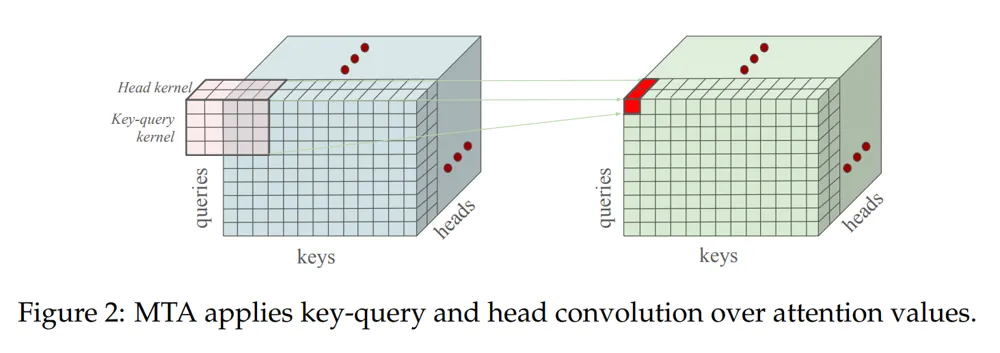

# 🎯 Multi-Head Attention — Intuition and Key Tensors

---

## ✅ Case 1: Single-Head Attention

### Input shape:

- Q: (tokens, dim)
- K: (tokens, dim)

To compute the attention scores:

scores = Q @ K.T

Shape:

(3, 4) @ (4, 3) = (3, 3)

The result is a `(tokens × tokens)` matrix showing the similarity between tokens.

---

## ✅ Case 2: Multi-Head Attention

### After the Linear layer + reshape:

Q.shape = (batch, num_heads, tokens, head_dim)
K.shape = (batch, num_heads, tokens, head_dim)

To compute attention score per head:

attn_scores = Q @ K.transpose(-2, -1)

Which results in:

(b, h, t, d) @ (b, h, d, t) → (b, h, t, t)

---

## 🧠 Why batch and head come first?

In Multi-Head Attention we compute:

- one independent attention for batch=0, head=0  
- another one for batch=0, head=1  
- and so on...

Putting (batch, head) first allows each combination to run its own attention in parallel.

---

## 🔁 Transposes breakdown:

| Step | Explanation |
|------|-------------|
|m)

To compute the attention scores:

scor| After linear projection |
|Intuition and Key Ten→ (b, heads, tokens, head_dim) | Bring heads forward |
|---

## ✅ Case 1: Singl→ (b, heads, head_dim, tokens) | For matrix multiplication |
|# ✅ Case 1:= (b, heads, tokens, tokens) | Final attention score |

---

## ✅ Final Summary:

### In simple terms:

For single-head:

Q: (tokens, dim)
K: (tokens, dim)
Q @ K.T → (tokens, tokens)

For multi-head:

Q: (tokens, dim) → reshaped to → (batch, heads, tokens, head_dim)
Q @ K.T → attention per head

---

### `Continues Vs Uncontinues`

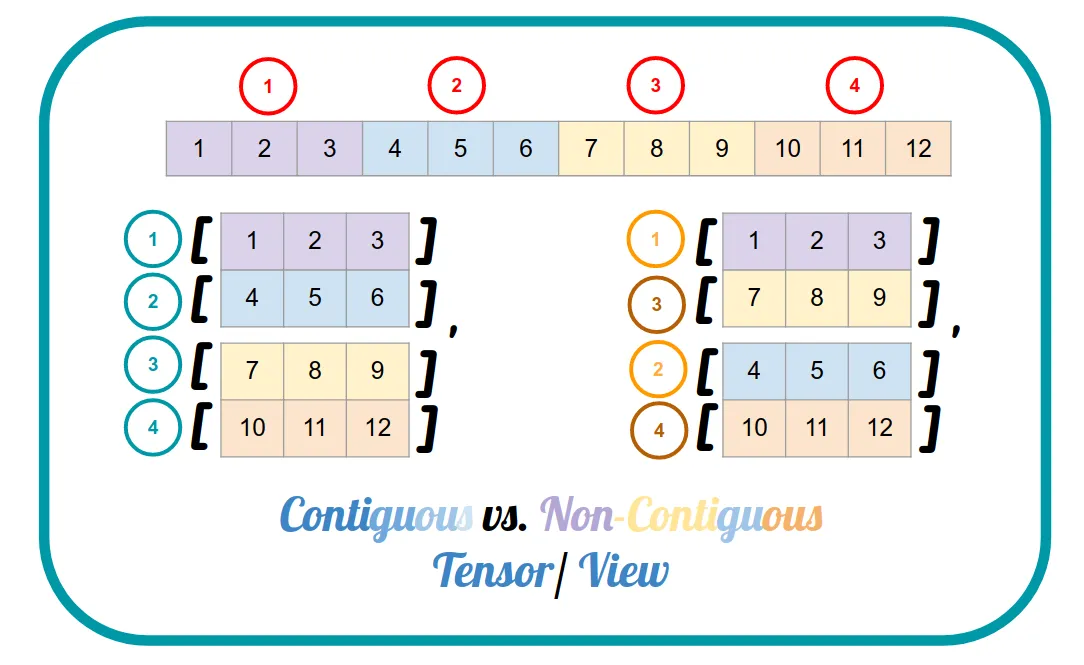

# 🎯 Understanding contiguous().view(...) and out_proj in Multi-Head Attention

---

## 🔹 1. context_vec = context_vec.contiguous().view(b, num_tokens, d_out)

### What it does:

- transpose() only changes the view of the tensor — not the actual memory layout.
- .view(...) requires that the tensor be stored contiguously in memory.
- So, contiguous() creates a new tensor with the same data but in a row-contiguous memory layout.
- This allows reshaping from (b, num_heads, tokens, head_dim) → (b, tokens, d_out)  
  where d_out = num_heads * head_dim.

---

## 🔹 2. context_vec = self.out_proj(context_vec)

### What it does:

- This is the final Linear layer in Multi-Head Attention.
- While .view(...) only concatenates the outputs of all heads,
  out_proj learns how to combine them optimally using trainable weights.
- Think of it as a "manager" deciding how much to use from each head.
- It also ensures the final shape (b, tokens, d_out) matches the rest of the model  
  (especially important for residual connections).

---

## ✅ Summary

| Code                          | Conceptual Role                                           |
|-------------------------------|-----------------------------------------------------------|
| contiguous().view(...)      | Rearranges memory layout to flatten heads correctly       |
| self.out_proj(...)          | Learns to combine all heads into one output representation |

---

## 🧠 Final Note

> Multi-Head Attention gives multiple "opinions" (heads).  
> The out_proj layer learns how to intelligently fuse those into a single output space.

![Screenshot 2025-07-06 143155.png](<attachment:Screenshot 2025-07-06 143155.png>)
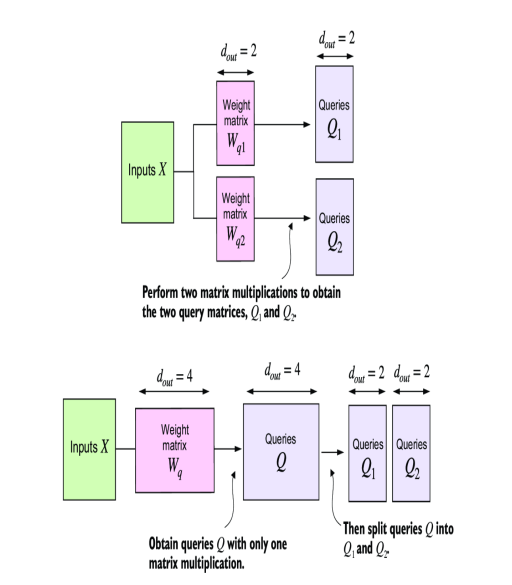

In [38]:
class MultiHeadAttention(nn.Module):
     def __init__(self, d_in, d_out,
                 context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()

       #___Ensures d_out is evenly divisible by num_heads for equal head dimensions___
        assert (d_out % num_heads == 0), \
              "d_out must be divisible by num_heads"
        
        #___Initializes input and output dimensions, number of heads, and dropout rate___
        #___d_in: input dimension, d_out: output dimension, num_heads: number of attention heads___
        #___This is important for multi-head attention to work correctly___
        #___Ensures d_out is evenly divisible by num_heads for equal head dimensions___
        self.d_out = d_out
        self.num_heads = num_heads

        #___Reduces the projection dim to match the desired output dim___
        self.head_dim = d_out // num_heads
      
          #___Uses a Linear layer to project inputs to queries, keys, and values___
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

        #___Uses a Linear layer to combine head outputs___
        #___Projects the concatenated context vectors to the output dimension___
        #___This is the final output of the attention mechanism___
        #___Ensures the output dimension matches the input dimension___
        #___This is important for residual connections in transformer architectures___
        self.out_proj = nn.Linear(d_out, d_out)

        #___Initializes dropout layer for regularization during training___
        #___Helps prevent overfitting by randomly setting some attention weights to zero___
        #___Dropout is applied to attention weights to improve generalization___
        #___This is a common practice in transformer architectures___
        self.dropout = nn.Dropout(dropout)
        
        #___Registers a buffer for the causal mask___
        #___This mask is used to prevent attending to future tokens in the sequence___
        #___This is important for autoregressive models like GPT___
        #___The mask is applied to attention scores to ensure causality___
        #___This is important for training models that generate text in a left-to-right manner___
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), 
                       diagonal=1)
        )
        

     def forward(self, x):
        #___Linear projections for queries, keys, and values___
        #___Extract batch size, number of tokens, and input dimension___
        #___b: batch size, num_tokens: number of tokens, d_in: input
        #___embedding dimension___
        #___This is important for multi-head attention to work correctly___
        b, num_tokens, d_in = x.shape     # x: (batch, seq_len, d_in)
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        #__Reshape the keys to match number of heads and head dimension__
        # b: batch size
        # num_tokens: number of tokens
        # self.num_heads: number of attention heads
        # self.head_dim: dimension of each head
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
            
            #___Compute attention scores___
            #___Transpose keys, queries, and values for multi-head attention___
        #___This is important for multi-head attention to work correctly___
        keys = keys.transpose(1, 2)  # (b, num_heads, num_tokens, head_dim)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)
        
        attn_scores = queries @ keys.transpose(2, 3)  # (b, num_heads, num_tokens, num_tokens)
        
        #___Apply causal mask to attention scores___
        # Ensure the mask is applied only to the relevant tokens
        num_tokens = attn_scores.shape[-1]
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        #___Normalize attention scores___
        attn_weights = torch.softmax(
            attn_scores / self.head_dim**0.5, dim=-1
        )

        #___Apply dropout to attention weights___
        attn_weights = self.dropout(attn_weights)

        #___Weighted sum of values___
        context_vecs = (attn_weights @ values).transpose(1, 2)  # (b, num_heads, num_tokens, head_dim)

        #___Reshape context vectors to combine heads___
        # Ensure the context vectors are contiguous in memory for efficient reshaping
        context_vecs = context_vecs.contiguous().view(b, num_tokens, self.d_out)

        #___Project the context vectors to the output dimension___
        # (b, num_tokens, d_out)
        context_vecs = self.out_proj(context_vecs)  # (b, num_tokens, d_out)
        
        return context_vecs

In [39]:
torch.manual_seed(123)  # For reproducibility

# Extracting the shape of the batch
# This will give us the batch size, context length, and input dimension
batch_size, context_length, d_in = batch.shape

d_out = 2 # Output dimension for multi-head attention

# Initializing the MultiHeadAttention class with the specified parameters
# d_in: input dimension, d_0ut: output dimension, context_length: number of tokens
# dropout: dropout rate, num_heads: number of attention heads
mha = MultiHeadAttention(
    d_in, d_out, context_length, dropout=0.0, num_heads=2
)

# Forward pass through the multi-head attention layer
context_vecs = mha(batch)

# This will print the shape of the context vectors after applying multi-head attention
print(context_vecs, "\n")
print("context_vecs.shape:", context_vecs.shape, "\n")
print(f"{context_vecs.shape[0]} batches, {context_vecs.shape[1]} tokens, {context_vecs.shape[2]} output dimension")


tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>) 

context_vecs.shape: torch.Size([2, 6, 2]) 

2 batches, 6 tokens, 2 output dimension


In [40]:
torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
print("batch_size:", batch_size)
print("context_length:", context_length)
print("d_in:", d_in)

d_out = 768

mha = MultiHeadAttention(
    d_in, d_out, context_length, dropout=0.0, num_heads=12
)

context_vecs = mha(batch)

print(context_vecs, "\n")
print("context_vecs.shape:", context_vecs.shape, "\n")
print(f"{context_vecs.shape[0]} batches, {context_vecs.shape[1]} tokens, {context_vecs.shape[2]} output dimension")


batch_size: 2
context_length: 6
d_in: 3
tensor([[[ 0.0208, -0.1094, -0.1502,  ...,  0.3617,  0.2821,  0.0099],
         [-0.0732, -0.1550, -0.1058,  ...,  0.4179,  0.2185,  0.0626],
         [-0.1013, -0.1662, -0.0936,  ...,  0.4298,  0.1946,  0.0779],
         [-0.1035, -0.1574, -0.0720,  ...,  0.3876,  0.1603,  0.0761],
         [-0.0765, -0.1191, -0.0922,  ...,  0.3362,  0.1465,  0.0587],
         [-0.0913, -0.1358, -0.0698,  ...,  0.3519,  0.1339,  0.0640]],

        [[ 0.0208, -0.1094, -0.1502,  ...,  0.3617,  0.2821,  0.0099],
         [-0.0732, -0.1550, -0.1058,  ...,  0.4179,  0.2185,  0.0626],
         [-0.1013, -0.1662, -0.0936,  ...,  0.4298,  0.1946,  0.0779],
         [-0.1035, -0.1574, -0.0720,  ...,  0.3876,  0.1603,  0.0761],
         [-0.0765, -0.1191, -0.0922,  ...,  0.3362,  0.1465,  0.0587],
         [-0.0913, -0.1358, -0.0698,  ...,  0.3519,  0.1339,  0.0640]]],
       grad_fn=<ViewBackward0>) 

context_vecs.shape: torch.Size([2, 6, 768]) 

2 batches, 6 tokens, 768